In [6]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from helper import visualize_input, plot_images
import modelFashionMnist as mfm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Ej Clasificación de Fashion MNIST

A partir de la notebook "Ejemplo-Fashion-MNIST.ipynb" armar una serie de clasificadores bayesianos:

1) Todos los pixels tiene la misma distribución de probabilidades para cada clase de grises y se generan de manera independiente.

2) Se separa la imagen en cuatro cuadrantes y los pixels de cada cuadrante tienen la misma distribución de probabilidades para cada clase y se generan de manera independiente.

Se pide estimar las probabilidades de niveles de grises para cada caso utilizando un subconjunto de entrenamiento de los datos y en función de esa estimación medir la performance del modelo con un subconjunto de validación

In [7]:
modelo = mfm.modelFashionMnist(256)

In [8]:
folder = './'
images = np.load(folder+'train_images.npy')
labels = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1, dtype=int, usecols=(0,))

images_test = np.load(folder+'test_images.npy')
labels_test = np.loadtxt(folder+'test_labels.csv', delimiter=',', skiprows=1, dtype=int, usecols=(0,))

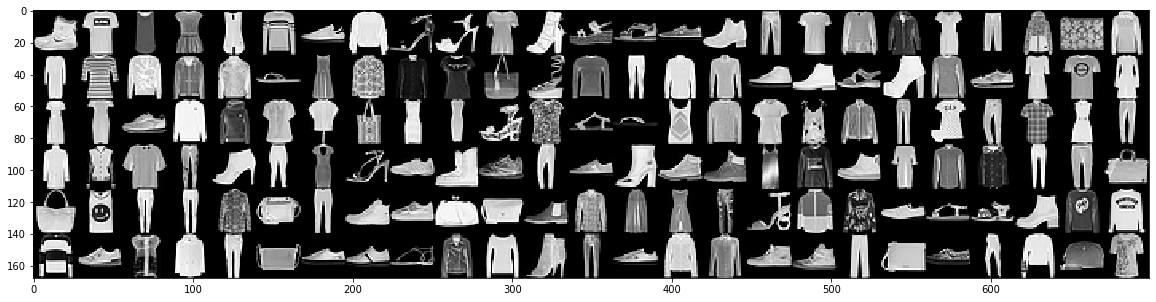

In [9]:
from MNIST_helper import plot_numbers
plot_numbers(images.reshape(-1,28,28),range(150), columns=25, figsize=(20, 20))

In [10]:
'''ver como esta la distribucion'''
#images.shape

'ver como esta la distribucion'

In [11]:
'''ver como esta el pixel 14 14 de la imagen 26'''
#images[27,14,14]

'ver como esta el pixel 14 14 de la imagen 26'

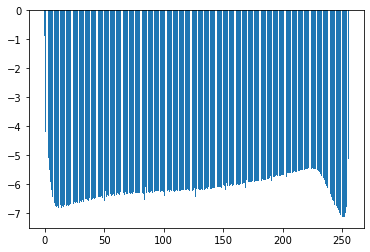

In [12]:
model_logprob, model_priori= modelo.gethist(images, labels, 0)
len(model_logprob)
plt.bar(list(range(256)),model_logprob)
plt.show()


In [13]:
'''
test_images = images_test[0]
hist_test = np.histogram(test_images.flatten(),
                        bins=256, 
                        range=[0,256], 
                        density=False)[0]
'''                                                

'\ntest_images = images_test[0]\nhist_test = np.histogram(test_images.flatten(),\n                        bins=256, \n                        range=[0,256], \n                        density=False)[0]\n'

In [14]:
'''ṕrobabilidad sin normalizar para una clase
np.dot(hist_test, model_logprob) + model_priori
'''

'ṕrobabilidad sin normalizar para una clase\nnp.dot(hist_test, model_logprob) + model_priori\n'

In [15]:
%%time
train_model = modelo.fit(images, labels)

CPU times: user 2.85 s, sys: 82.2 ms, total: 2.93 s
Wall time: 1.96 s


In [16]:
%%time
modelo.score(images_test, labels_test)

CPU times: user 3.58 s, sys: 23.1 ms, total: 3.6 s
Wall time: 3.6 s


0.3702

In [17]:
gauss_params = []
for cat in range(10):
    means = np.mean(images[labels==cat], axis=0)
    stds = np.std(images[labels==cat], axis=0) + 1e-8
    gauss_params.append((means, stds))

In [18]:
#media de la clase 0 punto 14-14
cat = 0
gauss_params[cat][0][14,14] #0 indica media 

#media de la clase 0 punto 14-14
gauss_params[cat][1][14,14] #1 indica desvio 

64.02603687001492

index 0: media: 151.098, desvio: 64.02603687001492
index 1: media: 30.2415, desvio: 58.307725436536536
index 2: media: 155.3085, desvio: 64.59957168879158
index 3: media: 176.065, desvio: 58.704637319727695
index 4: media: 175.97683333333333, desvio: 48.910417747998906
index 5: media: 60.42333333333333, desvio: 82.94107018770107
index 6: media: 144.60416666666666, desvio: 64.23177939247392
index 7: media: 160.13983333333334, desvio: 61.71489783301807
index 8: media: 159.3605, desvio: 63.583424525224984
index 9: media: 178.38433333333333, desvio: 48.59905303118095


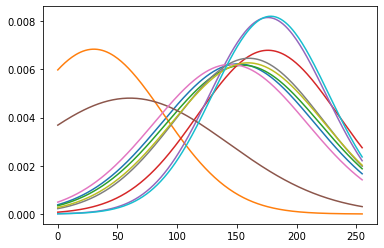

In [19]:
x, y = 14, 14
xs = np.linspace(0,255,255)

for cat in range(10):
    media = gauss_params[cat][0][x,y] 
    desvio = gauss_params[cat][1][x,y] 
    print("index {}: media: {}, desvio: {}".format(cat,media,desvio))
    pdf = norm(media, desvio)
    plt.plot(xs, pdf.pdf(xs),)
    
plt.show()